---

# Numerical Analysis
# Lagrange Interpolation Part2

## Remember

If $x_0, x_1, \dots , x_n$ are $n + 1$ distinct numbers and $f$ is a function whose values are given at these numbers, then a unique polynomial $P(x)$ of degree at most $n$ exists with :

$ f(x_k) = P(x_k) $ for each $k = 0, 1, \dots k$

This polynomial is given by:

$$ P(x) = f(x_0)L_{0}(x)+\dots+f(x_n)L_{n}(x) = \sum_{k=0}^{n}f(x_k)L_{k}(x) $$

where for each $k=0,1,\dots, n$, $L_{k}(x)$ is defined as follows:

$$ L_{k}(x) = \frac{(x-x_0)(x-x_1)\dots (x-x_{k-1})(x-x_{k+1})\dots (x-x_n)}{(x_k-x_0)(x_k-x_1)\dots (x_k-x_{k-1})(x_k-x_{k+1})\dots (x_k-x_n)} $$

$$ = \prod_{i=0\\ i\neq k}^{n} \frac{(x-x_i)}{(x_k-x_i)}$$

It is required to estimate the value of the function $\sqrt{u}$ at the value $u=1.4$ by interpolating the function at the following list of values

| $x$ | $1.0$ | $2.0$ | $3.0$ |
|---|-------|-------|-------|
| $y$ | $1.0$ | $1.4142$| $1.7321$|

Using Lagrnage Interpolation in Python.

Lagrange Algorithm Pseudo-Code:

```
Input:
    x: list of x values
    y: list of y values (list of f(x) values)
    u: the x value at which we want to interpolate f(x)
Output:
    An estimation of the value of f(u)

Algorithm:
    Calculate L_k(x) as follows:
        numenator = empty list
        denominator = empty list
        Repeat for i = 0, 1, ... , n (the number of x values)
            add to numenator (u - x_i) , where i != k
            add to denominator (x_k - x_i) , where i != k
        return Product(numenator) / Product(denominator)
     
    Calculate f(u) as follows:
        return sum of (y_i * L_i) for i = 0, 1, ..., n        

```

#### TO-DO (1)

Deﬁne a function `product(x)` that takes in a list of values and return their product (multiplication).

In [ ]:
def product(x):
    # YOUR CODE HERE
    p =1
    for _ in x:
      p *= _
    return p
    raise NotImplementedError()

In [ ]:
assert product([1,2,3,4]) == 24
assert product([4,3,2,1]) == 24

#### TO-DO (2)

Defien a function `L(k, x, u)` that takes in the index of the current term $L_k$, the x values `x`, and the input x value `u` - and returns the value of $L_k(x)$. Check the **Remember** cell above for how to compute this function.

In [ ]:
def L(k, x, u):
    # YOUR CODE HERE
    lst=[]
    for i in range(len(x)):
      if i!= k:
        lst.append((u-x[i])/(x[k]-x[i]))
    return product(lst)
    raise NotImplementedError()

In [ ]:
import numpy as np
assert np.isclose(L(1, [1,2,3], 1.4), 0.639999999999)

#### TO-DO (3)

Define a function `lagrange` that takes in the x values `x`, the y values `y`, the input x value `u` and returns an estimation of the interpolated function at `u`, `f(u)`. Check the **Remember** cell above for how to compute this value.

In [ ]:
def lagrange(x, y, u):
    # YOUR CODE HERE
    rslt= 0
    for i_ in range(len(x)):
      L_k = L(i_, x,u)
      rslt += L_k*y[i_]
    return rslt
    raise NotImplementedError()

In [ ]:
import numpy as np
assert np.isclose(lagrange([1,2,3], [1,1.4142,1.7321], 1.4), 1.177236)

#### TO-DO (4)

Repeat the computation with the additional data point $x = 1.2, y=1.09054$. The interpolated value at 1.4 should be stored in a variable `output`.

In [ ]:
# YOUR CODE HERE
output= lagrange([1,1.2,2,3], [1,1.09054,1.4142,1.7321],1.4)
#raise NotImplementedError()

In [ ]:
import numpy as np
assert np.isclose(output, 1.177236)

#### TO-DO (5)

Draw the graphs of $f(x)=1/(1 + 25 x^2)$ and $P(x)$, the Lagrange interpolating polynomial of degree 4 that interpolates $f(x)$ at the following list of points:

* `x=[-1.0, -0.5, 0.0, +0.5, +1.0]`. Use a 'blue' color for the drawing of $f(x)$ and a red color for $P(x)$ (in the same figure). 

In [ ]:
import numpy as np

# define the function f(x)
def f(x):
    return 1 / (1 + 25 * x**2)

# define the interpolation points
x_values = np.array([-1.0, -0.5, 0.0, +0.5, +1.0])
y_values = f(x_values)

In [ ]:
import matplotlib.pyplot as plt

def plot_fx_Px():
  # 1. plot f(x)
    # YOUR CODE HERE
    x= np.linspace(-1,1,1000)
    y=f(x)
    plt.figure(figsize=(6.4*1.5,4.8*1.5),facecolor=[0.91,0.91,0.91])
    plt.plot(x,y,color="blue")
  # 1. plot p(x)
    # YOUR CODE HERE
    y= lagrange(x_values,y_values,x)
    plt.plot(x,y,color="red")
    return plt.show()
    raise NotImplementedError()

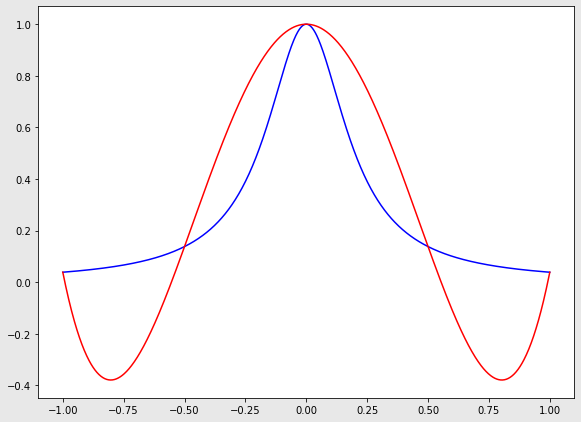

In [ ]:
plot_fx_Px()


* Increase the number of points used for the interpolation of $P(x)$ to 11 points (from -1 to +1 using increments of 0.2).

In [ ]:
import matplotlib.pyplot as plt

x_values = np.linspace(-1,1,11)
y_values = f(x_values)
def plot_fx_Px():
  # 1. plot f(x)
    # YOUR CODE HERE
    x= np.linspace(-1,1,1000)
    y=f(x)
    plt.figure(figsize=(6.4*1.5,4.8*1.5),facecolor=[0.91,0.91,0.91])
    plt.plot(x,y,color="blue")
  # 1. plot p(x)
    # YOUR CODE HERE
    y= lagrange(x_values,y_values,x)
    plt.plot(x,y,color="red")
    return plt.show()
    raise NotImplementedError()

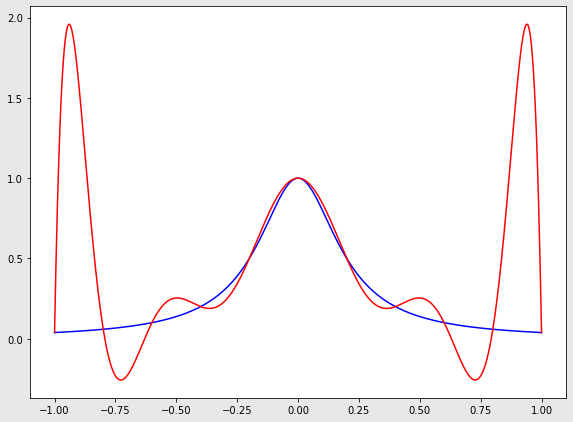

In [ ]:
plot_fx_Px()

* Repeat the above problem for $f(x)=sin(x)$. What can be concluded?

In [ ]:
# define the function f(x)
def f(x):
    return np.sin(x)
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
import matplotlib.pyplot as plt
x_values = np.linspace(-1,1,11)
y_values = f(x_values)
def plot_fx_Px():
  # 1. plot f(x)
    # YOUR CODE HERE
    x= np.linspace(-5.5,5.5,5000)
    y=f(x)
    plt.figure(figsize=(6.4*1.5,4.8*1.5),facecolor=[0.91,0.91,0.91])
    plt.plot(x,y,color="blue")
  # 1. plot p(x)
    # YOUR CODE HERE
    y= lagrange(x_values,y_values,x)
    plt.plot(x,y,color="red")
    return plt.show()
    raise NotImplementedError()

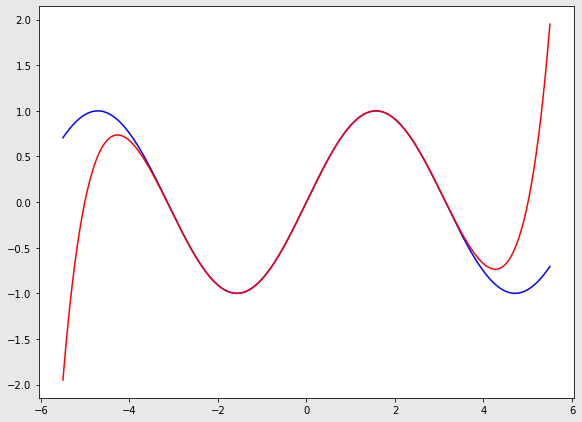

In [ ]:
plot_fx_Px()

**\[THE END\]**